#### Gelman-Rubin diagnostic
- The Gelman-Rubin diagnostic evaluates MCMC convergence by analyzing the behaviour of multiple Markov chains.
- Given multiple chains from different experimental runs, assessment is done by comparing the estimated between-chains and within-chain variances for each parameter, where large differences between the variances indicate non-convergence.
- Calculate the potential scale reduction factor (PSRF) which gives the ratio of the current variance in the posterior variance for each parameter compared to that being sampled.
- The values for the PSRF near 1 indicates convergence.
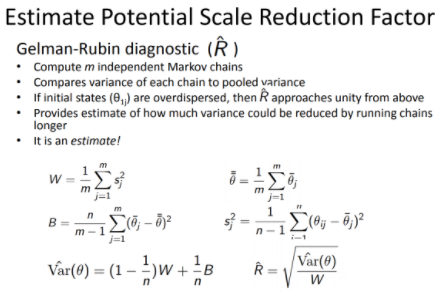

In [ ]:
# Source: https://github.com/intelligentEarth/pt-Bayeslands/blob/master/convergence_diagnosis/convergence_test.py
# Authors: R Scalzo and R Chandra

import numpy as np

def gelman_rubin(data):
    """
    Apply Gelman-Rubin convergence diagnostic to a bunch of chains.
    :param data: np.array of shape (Nchains, Nsamples, Npars) 
    """
    Nchains, Nsamples, Npars = data.shape    # n, m,
    B_on_n = data.mean(axis=1).var(axis=0)   # variance of in-chain means
    W = data.var(axis=1).mean(axis=0)        # mean of in-chain variances

    #print(B_on_n, ' B_on_n mean')

    #print(W, ' W variance')

    # simple version, as in Obsidian
    sig2 = (Nsamples / (Nsamples-1)) * W + B_on_n 
    Vhat = sig2 + B_on_n / Nchains
    Rhat = Vhat / W

    # advanced version that accounts for ndof
    m, n = np.float(Nchains), np.float(Nsamples)
    si2 = data.var(axis=1)
    xi_bar = data.mean(axis=1)
    xi2_bar = data.mean(axis=1)**2
    var_si2 = data.var(axis=1).var(axis=0)
    allmean = data.mean(axis=1).mean(axis=0)
    
    cov_term1 = np.array([np.cov(si2[:,i], xi2_bar[:,i])[0,1] for i in range(Npars)])
    cov_term2 = np.array([-2*allmean[i]*(np.cov(si2[:,i], xi_bar[:,i])[0,1]) for i in range(Npars)])
    
    var_Vhat = (((n-1)/n)**2 * 1.0/m * var_si2 + ((m+1)/m)**2 * 2.0/(m-1) * B_on_n**2
                + 2.0*(m+1)*(n-1)/(m*n**2) * n/m * (cov_term1 + cov_term2))
    df = 2 * Vhat**2 / var_Vhat

    #print(df, ' df ')
    #print(var_Vhat, ' var_Vhat')
    #print "gelman_rubin(): var_Vhat = {}, df = {}".format(var_Vhat, df)

    Rhat *= df/(df-2)

    print(Rhat, ' Rhat')

    return Rhat


def main():

    proposal = ['rw', 'adap-rw']

    m = 0
    problem = ['crater', 'etopo', 'mountain']
    i = 0
    
    for i in range(0,3):
        
        for m in range(0,2):

            print(proposal[m], problem[i])
            pos_run1 = np.loadtxt('data/'+proposal[m]+'/'+problem[i]+'/pos_run1.txt')  
            pos_run2 = np.loadtxt('data/'+proposal[m]+'/'+problem[i]+'/pos_run2.txt')  
            pos_run3 = np.loadtxt('data/'+proposal[m]+'/'+problem[i]+'/pos_run3.txt')  
            pos_run4 = np.loadtxt('data/'+proposal[m]+'/'+problem[i]+'/pos_run4.txt')  
            pos_run5 = np.loadtxt('data/'+proposal[m]+'/'+problem[i]+'/pos_run5.txt')  

            data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

            #print(data) 
            gelman_rubin(data)
            
            
if __name__ == "__main__": 
    main()